In [4]:
# Lib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
from scipy import signal
from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Define Column Names
columns=["timeRelativeRef", "samplingTime", "epoch", "latitude","longitude","altitude","speed", 
            "satellites","accelerationX", "accelerationY", "accelerationZ", "roll", "pitch","yaw",
            "temperatur","humidity", "barometricPressure","light","PM1.0_CF1", "PM2.5_CF1", "PM10.0_CF1",
            "PM1.0_Auto", "PM2.5_Auto", "PM10.0_Auto","label"]

In [24]:
# Read data

Bricked2 = pd.read_csv("Labeled Training data\Bricked road\DATA004.CSV", names=columns)
Pothole1 = pd.read_csv("Labeled Training data\Pothole\DATA001.CSV", names=columns)

In [25]:
# add labels in all DataFrames
Bricked2['label'] = 'bricked'
Pothole1['label'] = 'pothole'

# Function definations

In [8]:
def givemeclean(df):
    '''
    remove what we dont need
    '''
    df=df[['timeRelativeRef', 'samplingTime', 'speed', 'accelerationX', 'accelerationY', 'accelerationZ', 'roll', 'pitch', 'yaw']]
    return df

def mstosec(df):
    '''
    convert ms to sec and start it from zero for better understanding
    '''
    df['timeRelative_sec'] = df['timeRelativeRef']/1000  
    df['timeRelative_sec'] = df['timeRelative_sec']-min(df['timeRelative_sec']) 
    df['equal_sampled_numbers'] = df.index 
    return df


def plotnzoom(df, attribute = 'attribute', name = 'Bricked'):
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'sans-serif' 
    plt.rcParams['font.serif'] = 'Ubuntu' 
    plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
    plt.rcParams['font.size'] = 14 
    plt.rcParams['axes.labelsize'] = 12 
    plt.rcParams['axes.labelweight'] = 'bold' 
    plt.rcParams['axes.titlesize'] = 12 
    plt.rcParams['xtick.labelsize'] = 12 
    plt.rcParams['ytick.labelsize'] = 12 
    plt.rcParams['legend.fontsize'] = 12 
    plt.rcParams['figure.titlesize'] = 12 
    plt.rcParams['image.cmap'] = 'jet' 
    plt.rcParams['image.interpolation'] = 'none' 
    plt.rcParams['figure.figsize'] = (15, 15) 
    plt.rcParams['axes.grid']=True
    plt.rcParams['lines.linewidth'] = 2 
    plt.rcParams['lines.markersize'] = 8
    colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
    'xkcd:scarlet']
    '''
    make detailed plots
    '''
    x = df['timeRelative_sec']
    xe = df['equal_sampled_numbers']
    y = df[attribute]
    #global sampleRate = round(len(x)/max(x))

    plt.rcParams['figure.figsize'] = (17, 15)

    plt.subplot(3,1,1)
    plt.plot(x,y,'navy', linewidth = 0.5);plt.title(name +' labeled data',fontsize=18)
    #speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
    plt.legend([attribute+'',"Speed (m/sec.)"])
    plt.ylabel(attribute+'($m/s$)',fontsize=20)
    plt.grid(True)

    plt.subplot(3,1,2)
    plt.plot(x,y,'navy', linewidth = 0.5)
    speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
    plt.legend([attribute+'',"Speed (m/sec.)"])
    speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
    plt.title(name+'labeled data  ||  zoom in',fontsize=20)
    plt.ylabel(attribute+'($m/s$)',fontsize=20)
    #plt.xlabel('Time (Sec.)',fontsize=20)
    plt.xlim(70, 150)


    plt.subplot(3,1,3)
    plt.plot(x,y,'navy', linewidth = 0.5)
    speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
    plt.legend([attribute+'',"Speed (m/sec.)"])
    speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
    plt.title(name+' labeled data  ||  zoom in',fontsize=20)
    plt.ylabel(attribute+'($m/s$)',fontsize=20)
    plt.xlabel('Time (Sec.)',fontsize=20)
    plt.xlim(70, 150)
    plt.xlim(72, 103)
    plt.rcParams['figure.figsize'] = (17, 7)
    


In [9]:
def labelroadtype(df, label='Bricked'):
    df['filter_Label'] = df['accelerationZ'].apply(lambda x: label if x >= 1.3 or x<=0.5 else 'plan road')
    return df

# Select two road types

In [10]:
bricks = givemeclean(Bricked2) ;bricks = mstosec(bricks)
pothole = givemeclean(Pothole1) ;pothole = mstosec(pothole)

# Visualization

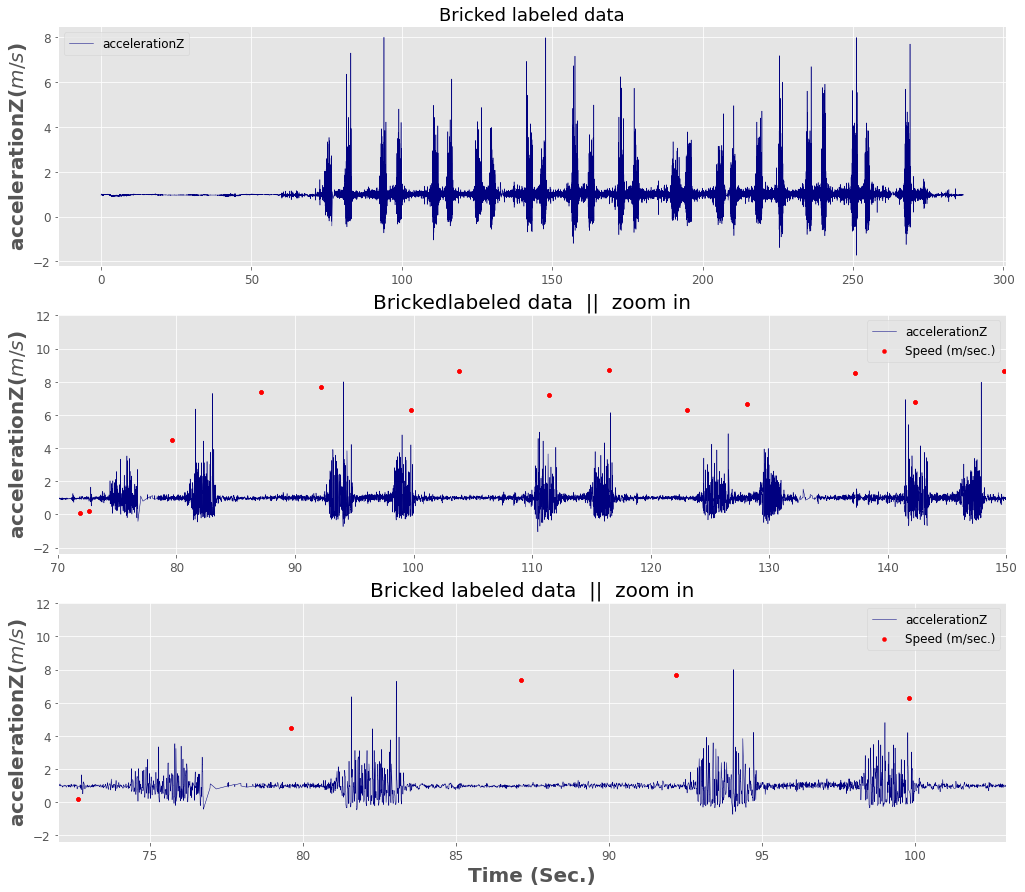

In [11]:
plotnzoom(bricks, attribute = 'accelerationZ', name = 'Bricked') # Bricked data

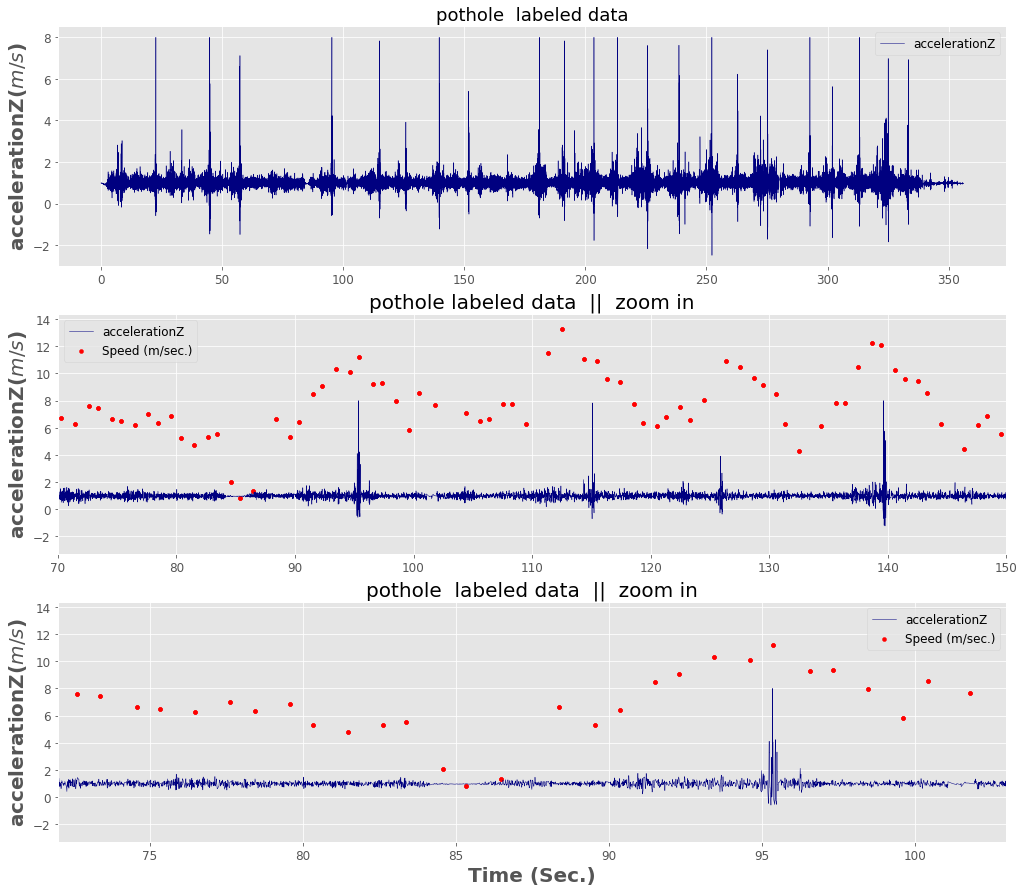

In [12]:
plotnzoom(pothole, attribute = 'accelerationZ', name = 'pothole ') # pothole data

# Label plan road and anomaly


In [13]:
bricks = labelroadtype(bricks, label='Bricked')
pothole = labelroadtype(pothole, label='pothole')

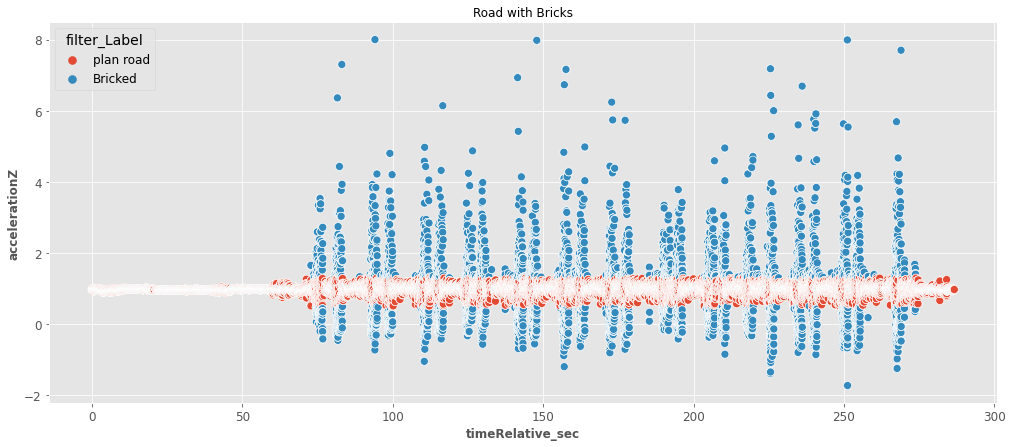

In [14]:
# Visualize labels
brickraod = sns.scatterplot(data=bricks, x="timeRelative_sec", y="accelerationZ", hue="filter_Label");
brickraod.set(title = "Road with Bricks");

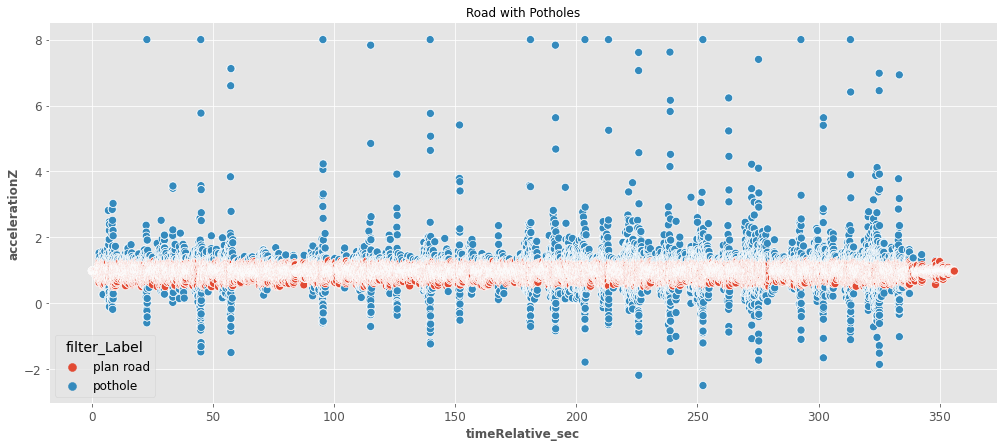

In [15]:
# Visualize labels
potroad = sns.scatterplot(data=pothole, x="timeRelative_sec", y="accelerationZ", hue="filter_Label");
potroad.set(title = "Road with Potholes");

# Clean and label again 

Text(0.5, 1.0, 'Data Cleaning: Bricks')

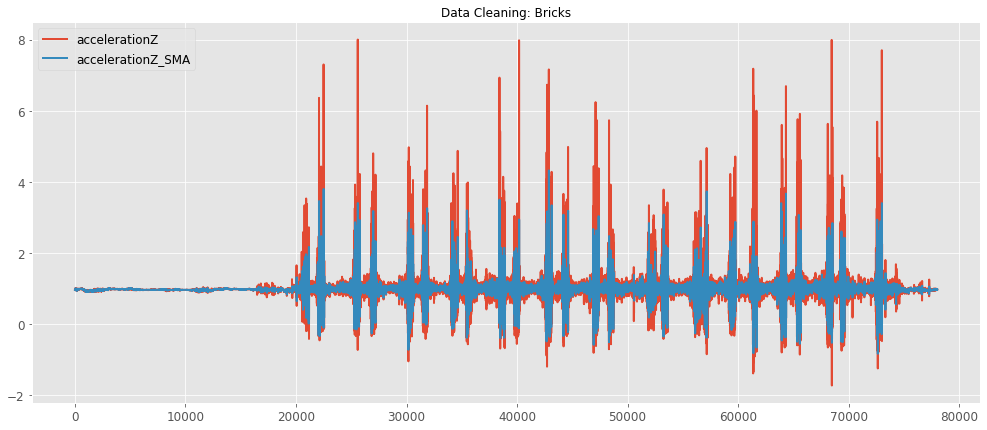

In [17]:
bricks['accelerationZ_SMA'] = bricks.accelerationZ.rolling(window=10).mean()
bricks[['accelerationZ','accelerationZ_SMA']].plot()
#df['diff'].hist()
plt.title('Data Cleaning: Bricks')

In [18]:
bricks['cleaned_label'] = bricks['accelerationZ_SMA'].apply(lambda x: 'brick' if x >= 1.3 or x<=0.7 else 'plan road')

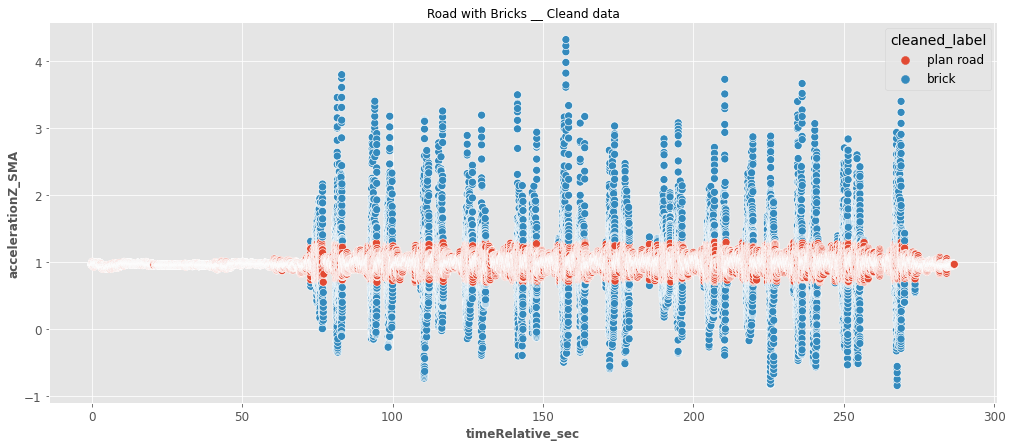

In [19]:
brickraod = sns.scatterplot(data=bricks, x="timeRelative_sec", y="accelerationZ_SMA", hue="cleaned_label");
brickraod.set(title = "Road with Bricks __ Cleand data");

Text(0.5, 1.0, 'Data Cleaning : Pothole')

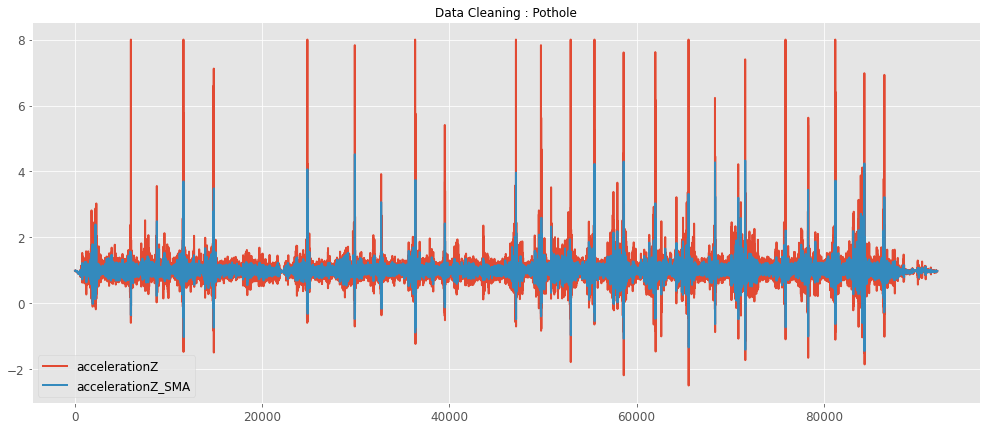

In [20]:
pothole['accelerationZ_SMA'] = pothole.accelerationZ.rolling(window=10).mean()
pothole[['accelerationZ','accelerationZ_SMA']].plot()
#df['diff'].hist()
plt.title('Data Cleaning : Pothole')

In [21]:
pothole['cleaned_label'] = pothole['accelerationZ_SMA'].apply(lambda x: 'pothole' if x >= 1.3 or x<=0.7 else 'plan road')

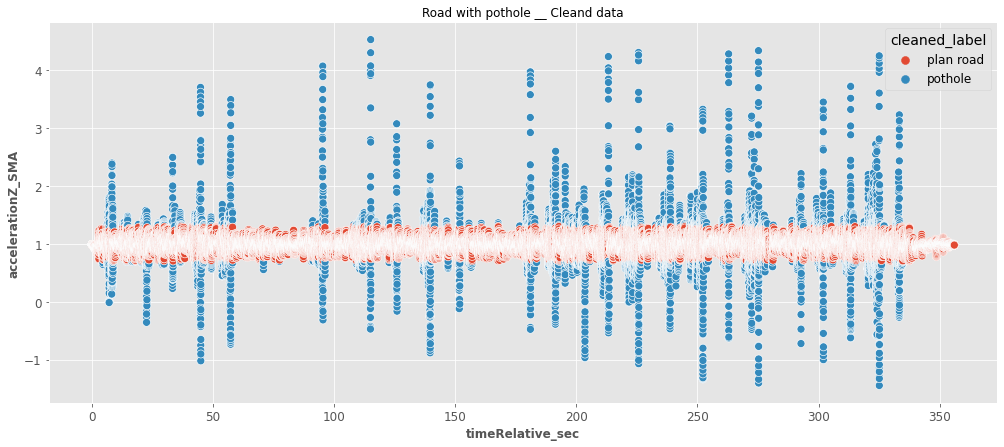

In [22]:
potholeraod = sns.scatterplot(data=pothole, x="timeRelative_sec", y="accelerationZ_SMA", hue="cleaned_label");
potholeraod.set(title = "Road with pothole __ Cleand data");

In [23]:
roads = pd.concat([bricks, pothole], ignore_index=True, sort=False) # concatenate two datasets

In [238]:
roads.head().T

,0,1,2,3,4
timeRelativeRef,1383982,1384051,1384066,1384071,1384074
samplingTime,1383982,69,16,4,3
speed,NaN,NaN,NaN,NaN,NaN
accelerationX,-0.36,-0.35,-0.35,-0.35,-0.35
accelerationY,-0.04,-0.05,-0.06,-0.05,-0.05
accelerationZ,0.96,0.96,0.96,0.96,0.96
roll,1.22,1.28,1.46,1.46,1.46
pitch,-7.81,-9.22,-9.52,-9.52,-9.52
yaw,-1.1,0.0,0.37,0.37,0.37
timeRelative_sec,0.0,0.069,0.084,0.089,0.092


In [239]:
#plt.plot(roads.timeRelativeRef, roads.accelerationZ);
roads= roads[roads['accelerationZ_SMA'].notna()]
X= roads[['accelerationZ_SMA', 'accelerationX', 'accelerationY', 'roll', 'pitch', 'yaw']]

y = roads['cleaned_label']

X1= roads[['accelerationZ', 'accelerationX', 'accelerationY', 'roll', 'pitch', 'yaw']]
y1=roads['filter_Label']

# classification

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [242]:
from sklearn.svm import SVC
model = SVC()

In [243]:
model.fit(X_train, y_train)

SVC()

In [244]:
model.score(X_test, y_test)

0.9327220720191215

In [ ]:
#####################3

In [245]:
y_pred = model.predict(X_test)

In [246]:
type(y_train)

pandas.core.series.Series

In [247]:
y_test.unique()

array(['plan road', 'pothole', 'brick'], dtype=object)

In [248]:
roads.cleaned_label.unique()

array(['plan road', 'brick', 'pothole'], dtype=object)

In [251]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[  432  1755    21]
 [  171 47042    21]
 [  146  1320   134]]

Accuracy: 0.93

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.76
Macro Recall: 0.43
Macro F1-score: 0.47

Weighted Precision: 0.92
Weighted Recall: 0.93
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 1       0.58      0.20      0.29      2208
     Class 2       0.94      1.00      0.97     47234
     Class 3       0.76      0.08      0.15      1600

    accuracy                           0.93     51042
   macro avg       0.76      0.43      0.47     51042
weighted avg       0.92      0.93      0.91     51042



In [264]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [269]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['plan road','pothole','brick'], 
                     columns = ['plan road','pothole','brick'])

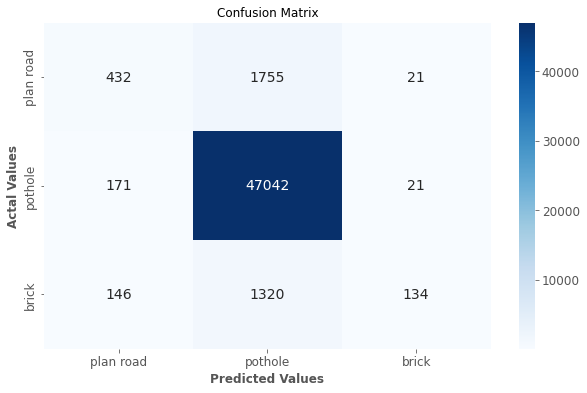

In [283]:
#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [273]:
cm_df

,plan road,pothole,brick
plan road,432,1755,21
pothole,171,47042,21
brick,146,1320,134
